# NETWORK ANALYTICS OF FINANCIAL ASSET CLASSES PRICES - USING NETWORKX WITH NETWORK VISUALISATIONS¶

## Importing Python Libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode

# Plotly Offline Mode Configuration
init_notebook_mode(connected=True)

print("Import Completed")

Import Completed


In [2]:
# import warnings
# filte
# warnings.filterwarnings("ignore")

# Jupyter Notebook Formatting and Display
from IPython.core.display import HTML, display

print("Execution Completed")

Execution Completed


## Dataset Representation

### The dataset includes the various asset classes prices collected for a period of 4 years between November 2013 and November 2017; stored in a csv file format.

### It represents the daily adjusted closing prices of 39 major ETFs corresponding to different asset classes covering bonds, currencies, commodities and equities.

## Data Import and Load

In [10]:
%load_ext nb_black

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

In [11]:
# Importing the Drive to Load Data from the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [12]:
# Importing the CSV Dataset
asset_class_prices = pd.read_csv("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Network_Analytics_of_Financial_Asset_Classes_Prices_Using_NetworkX_and_Visualisations/data/financial_asset_classes_daily_prices.csv", index_col="Date")

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

In [13]:
# Displaying the First 5 Data Instances of the asset class prices

asset_class_prices.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,France,UK,GBP,China Large Cap,Euro,China,Yen,Gold Miners,Gold,10yr treasuries,US real estate,High yield Bond,Corp Bond,Silver,SNP 500,Bonds II,20+ Treasuries,Oil,USD,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-08,81.83,16.40,235.46,46.78,69.87,114.60,47.69,33.18,30.95,60.02,31.08,34.79,127.55,77.53,111.87,46.79,84.36,22.89,121.63,106.41,82.49,36.75,120.90,16.06,259.11,114.23,126.36,11.41,24.66,58.20,72.77,33.53,58.70,69.82,26.25,64.01,55.70,104.96,94.5100
2017-11-07,81.89,16.43,235.42,46.56,69.64,114.65,47.22,33.07,31.09,59.65,31.09,34.81,128.04,77.21,111.79,46.72,84.27,22.73,121.21,106.54,81.94,36.93,121.06,16.01,258.67,114.30,126.64,11.49,24.67,58.17,72.20,33.52,58.64,70.16,26.38,63.66,55.66,105.01,94.5400
2017-11-06,81.86,16.53,235.41,46.86,69.90,115.26,47.20,33.34,31.22,59.18,31.32,35.07,128.09,77.59,111.98,46.45,84.39,22.91,121.65,106.50,81.36,36.98,121.16,16.27,258.85,114.14,126.11,11.51,24.63,58.67,71.98,33.34,58.58,70.25,26.75,63.63,55.00,105.00,94.7500
2017-11-03,81.80,16.22,235.18,46.34,69.80,115.42,47.09,33.39,31.22,59.19,31.35,34.85,127.11,77.29,111.96,46.28,84.14,22.43,120.62,106.37,80.43,37.00,121.13,15.92,258.45,113.95,125.64,11.18,24.69,58.58,71.88,33.66,58.83,68.68,26.78,63.49,55.21,105.00,94.4400
2017-11-02,81.73,16.12,234.96,46.58,69.91,116.15,47.31,33.50,31.43,59.05,31.47,34.84,127.02,77.01,112.50,46.45,84.20,22.58,121.19,106.20,80.48,37.02,120.99,16.17,257.59,113.87,125.30,10.99,24.63,58.69,71.89,33.71,58.86,68.48,26.89,62.99,55.01,105.04,94.6299


<IPython.core.display.Javascript object>

In [14]:
# Extracting the Size of the Dataset

data_shape = asset_class_prices.shape
print(f"There are {data_shape[0]} rows and {data_shape[1]} columns in the dataset")
print(
    (
        f"Data Timeperiod Covers: {min(asset_class_prices.index)} "
        f"to {max(asset_class_prices.index)}"
    )
)

There are 1013 rows and 39 columns in the dataset
Data Timeperiod Covers: 2013-11-01 to 2017-11-08


<IPython.core.display.Javascript object>

As we can see from the above results; asset classes prices dataset contains 39 different assets and 1013 records for each asset. The time-series is in the reverse order (newest to oldest) and there are no missing datapoints in the dataset. 

## Computaion of the Relationships in the Asset Classes Prices

### Conversion to Log Returns to Meet the Real-World Business Scenario

Before calculating the correlation matrix and the relationships, it is important to first normalise the dataset and convert the absolute asset prices into daily returns. In the business context of financial time-series; it is common to make this transformation as investors are typically interested in returns on assets rather than their absolute prices. By normalising the data it allows us to compare the expected returns of two assets more easily.


In [21]:
# Create an Empty Dataframe to Hold the Log Returns Information
asset_log_returns = pd.DataFrame()

# Computing the Log Returns of Each Asset
# Loop Through Each Column in the Dataframe and Compute the Daily Log Returns of the Asset Classes
# Add Log Returns Column to the New Dataframe

for col in asset_class_prices.columns:
    # Dates are given in the Reverse Order; hence Set the Difference to -1
    asset_log_returns[col] = np.log(asset_class_prices[col]).diff(-1)

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

In [22]:
# Verifying the Output of the Assets Log Returns Dataframe
asset_log_returns.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,France,UK,GBP,China Large Cap,Euro,China,Yen,Gold Miners,Gold,10yr treasuries,US real estate,High yield Bond,Corp Bond,Silver,SNP 500,Bonds II,20+ Treasuries,Oil,USD,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-08,-0.000733,-0.001828,0.000170,0.004714,0.003297,-0.000436,0.009904,0.003321,-0.004513,0.006184,-0.000322,-0.000575,-0.003834,0.004136,0.000715,0.001497,0.001067,0.007014,0.003459,-0.001221,0.006690,-0.004886,-0.001323,0.003118,0.001700,-0.000613,-0.002213,-0.006987,-0.000405,0.000516,0.007864,0.000298,0.001023,-0.004858,-0.004940,0.005483,0.000718,-0.000476,-0.000317
2017-11-07,0.000366,-0.006068,0.000042,-0.006423,-0.003727,-0.005306,0.000424,-0.008131,-0.004173,0.007911,-0.007371,-0.007441,-0.000390,-0.004910,-0.001698,0.005796,-0.001423,-0.007888,-0.003623,0.000376,0.007104,-0.001353,-0.000826,-0.016109,-0.000696,0.001401,0.004194,-0.001739,0.001623,-0.008559,0.003052,0.005384,0.001024,-0.001282,-0.013928,0.000471,0.011929,0.000095,-0.002219
2017-11-06,0.000733,0.018932,0.000977,0.011159,0.001432,-0.001387,0.002333,-0.001499,0.000000,-0.000169,-0.000957,0.006293,0.007680,0.003874,0.000179,0.003667,0.002967,0.021174,0.008503,0.001221,0.011497,-0.000541,0.000248,0.021747,0.001546,0.001666,0.003734,0.029090,-0.002433,0.001535,0.001390,-0.009552,-0.004259,0.022602,-0.001121,0.002203,-0.003811,0.000000,0.003277
2017-11-03,0.000856,0.006184,0.000936,-0.005166,-0.001575,-0.006305,-0.004661,-0.003289,-0.006704,0.002368,-0.003820,0.000287,0.000708,0.003629,-0.004812,-0.003667,-0.000713,-0.006665,-0.004714,0.001599,-0.000621,-0.000540,0.001156,-0.015581,0.003333,0.000702,0.002710,0.017141,0.002433,-0.001876,-0.000139,-0.001484,-0.000510,0.002916,-0.004099,0.007906,0.003629,-0.000381,-0.002009
2017-11-02,0.000979,0.006223,0.003283,0.001289,0.003008,0.002759,0.005723,0.004488,0.009591,0.001186,0.003820,-0.000861,-0.014227,0.004425,0.003651,0.004748,0.000713,0.004439,0.000660,0.001319,0.006232,-0.000540,-0.000165,-0.000618,0.000388,0.001494,0.004399,0.008223,0.000000,0.002559,0.002089,-0.011210,-0.007279,-0.002916,0.009341,0.000476,0.003642,0.000000,0.004553


<IPython.core.display.Javascript object>

## Calculation of the Correlation Matrix and Relationships

In [23]:
# Calculating the Correlation Matrix using Pandas Function named "corr()"
correlation_matrix = asset_log_returns.corr()

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

In [24]:
# Displaying the First 5 Data Instances of the Correlation Matrix

correlation_matrix.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,France,UK,GBP,China Large Cap,Euro,China,Yen,Gold Miners,Gold,10yr treasuries,US real estate,High yield Bond,Corp Bond,Silver,SNP 500,Bonds II,20+ Treasuries,Oil,USD,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Bonds Global,1.000000,-0.086234,-0.279161,-0.069623,-0.177521,0.296679,-0.104739,-0.188547,-0.201014,-0.159231,-0.174957,-0.176372,0.025453,0.077551,0.210534,-0.139253,0.528101,0.332186,0.424030,0.943114,0.183265,-0.056202,0.885493,0.263857,-0.252791,0.830621,0.897099,-0.132973,-0.271159,-0.181249,-0.141707,0.222886,-0.220603,-0.198536,-0.420264,-0.197672,0.301774,0.598105,0.250142
Commodities,-0.086234,1.000000,0.305137,0.428909,0.369637,0.313791,0.400316,0.283711,0.331083,0.250509,0.322063,0.410183,0.232629,0.530506,0.145447,0.288835,-0.033186,0.339476,0.215085,-0.151424,0.150540,0.414801,-0.053893,0.353179,0.315000,0.077331,-0.190364,0.884792,-0.193075,0.367019,0.341089,-0.224835,0.429541,0.677430,0.257454,0.225463,0.089290,0.028872,0.042324
DOW,-0.279161,0.305137,1.000000,0.719260,0.793387,0.343817,0.688344,0.722882,0.666315,0.691672,0.729587,0.746862,0.151011,0.280225,-0.121000,0.612571,-0.439457,0.042281,-0.192626,-0.392811,0.594564,0.626514,-0.146227,0.029518,0.967209,-0.222482,-0.399579,0.308614,0.121717,0.765251,0.769604,-0.797538,0.817422,0.655544,0.874902,0.849271,0.395247,-0.042967,-0.172730
Emerg Markets,-0.069623,0.428909,0.719260,1.000000,0.796425,0.580454,0.815049,0.697222,0.660268,0.638955,0.721991,0.749025,0.269280,0.438110,0.060038,0.840342,-0.221798,0.211616,-0.007564,-0.201178,0.530254,0.643085,0.019360,0.201241,0.746488,-0.004781,-0.227267,0.393916,-0.095023,0.763111,0.811155,-0.668680,0.674630,0.607172,0.606749,0.686458,0.365031,0.123624,-0.018461
EAFE,-0.177521,0.369637,0.793387,0.796425,1.000000,0.466883,0.790699,0.884385,0.830052,0.785198,0.913501,0.905149,0.401778,0.401163,0.149487,0.665391,-0.311656,0.116489,-0.099484,-0.296642,0.533138,0.634928,-0.064994,0.127295,0.815242,-0.098676,-0.326222,0.354877,-0.169746,0.949368,0.872972,-0.721559,0.720030,0.610561,0.711714,0.725415,0.352270,0.050121,0.021760


<IPython.core.display.Javascript object>

## Building the Correlations Heatmap



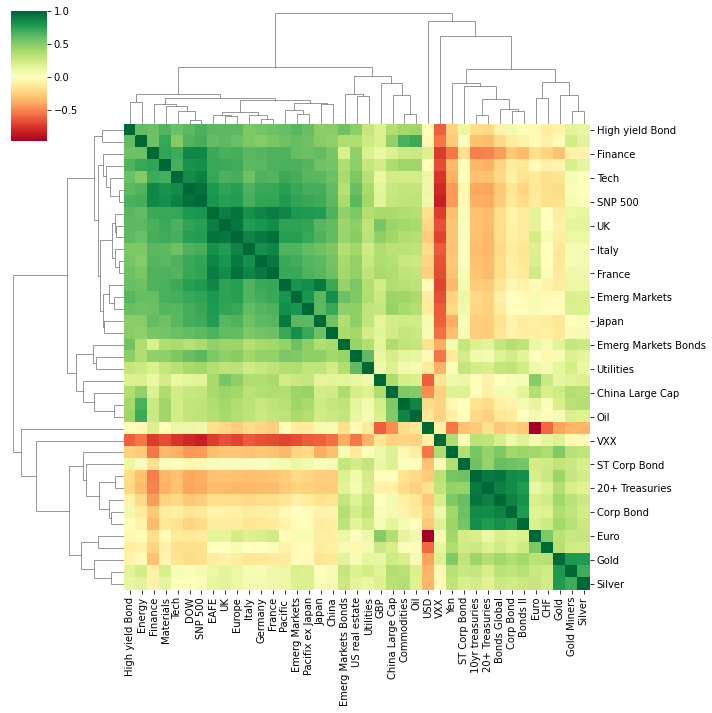

<IPython.core.display.Javascript object>

In [25]:
# Visualising the Correlation Matrix using a Clustered Heatmap

display(HTML("<h3>Clustered Heatmap: Correlations Between Asset Class Price Returns</h3>"))
sns.clustermap(correlation_matrix, cmap="RdYlGn")
plt.show()

### Insights Derived from the Headmap

The heatmap is colour coded using a divergent colourscale where strong positive correlations (correlation = 1) are dark green, uncorrelated assets are yellow (correlation = 0) and negatively correlated assets are red (correlation = -1).

The clustered heatmap visualisation already gives a good picture of the data and tells an interesting story:
1. Broadly speaking, there are two major clusters of assets. These appear to be separated into equities and "non-equity" assets (e.g. bonds, currencies and precious metals). The heatmap shows that these two categories are generally negatively or non-correlated with each other which is expected as 'safe haven' assets such as bonds, gold and currencies like the Japanese Yen tend to move in opposite directions to equities which are seen as a riskier asset class. 
2. ETFs tracking Geographic regions which are close to each other are highly correlated with each other. For example, UK, Europe, Germany, Italy and France ETFs are highly correlated with each other, so are Japan, Pacific ex Japan and China ETFs
3. The VXX ETF is strongly negatively correlated with equities.  


## Network Visualisations and Representation

Heatmaps are useful, however, they can only convey one dimension of information (the magnitude of the correlation between two assets). As an investor wanting to make a decision on which asset classes to invest in, a heatmap still does not help answer important questions such as what the annualized returns and volatility of an asset class is. 

We can use network graphs to investigate the initial findings from the heatmap further and visualise them in a more accessible way which encodes more information.

**Networkx**

[Networkx](https://networkx.github.io/documentation/stable/) is one of the most popular and useful Python libraries for analysing small/medium size networks. 

In order to analyse the correlations matrix as a network we first need to convert the correlations between assets to an edge list. This is a list containing information for each connection between each asset ETF in our data. This format requires the 'source' node (ETF), the 'target' node and the 'weight' (correlation) of the link between the two.

### Creation of the Edge List

In [26]:
# Converting Correlation Matrix into a List of Edges and Rename the Columns

edges = correlation_matrix.stack().reset_index()
edges.columns = ["asset_1", "asset_2", "correlation"]

# Removing Self Correlations
edges = edges.loc[edges["asset_1"] != edges["asset_2"]].copy()

# Displaying the First 5 Data Instances of the Edge List Dataframe.
edges.head()

,asset_1,asset_2,correlation
1,Bonds Global,Commodities,-0.086234
2,Bonds Global,DOW,-0.279161
3,Bonds Global,Emerg Markets,-0.069623
4,Bonds Global,EAFE,-0.177521
5,Bonds Global,Emerg Markets Bonds,0.296679


<IPython.core.display.Javascript object>

### Creation of the Graph from the Edge List

Now that we have an edge list; we need to feed that into the networkx library to create a graph. Note that this network is undirected as the correlation between assets is the same in both directions.

In [39]:
# Creating Undirected Graph with Weights corresponding to the Correlation Magnitude
asset_graph = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

In [52]:
# Verifying the Graph Info and the Various Network Characteristics

print("Graph Info: ", nx.info(asset_graph))
print("\nGraph Average Degree: ", nx.degree(asset_graph))

print("\nGraph Degree Centrality: ", nx.degree_centrality(asset_graph))
print("\nGraph Closeness Centrality: ", nx.closeness_centrality(asset_graph))
print("\nGraph Edge Betweenness Centrality: ", nx.edge_betweenness_centrality(asset_graph))
print("\nGraph Eigenvector Centrality: ", nx.eigenvector_centrality(asset_graph))
print("\nGraph Shortest Path: ", nx.shortest_path(asset_graph))

Graph Info:  Graph with 39 nodes and 741 edges

Graph Average Degree:  [('Bonds Global', 38), ('Commodities', 38), ('DOW', 38), ('Emerg Markets', 38), ('EAFE', 38), ('Emerg Markets Bonds', 38), ('Pacifix ex Japan', 38), ('Germany', 38), ('Italy', 38), ('Japan', 38), ('France', 38), ('UK', 38), ('GBP', 38), ('China Large Cap', 38), ('Euro', 38), ('China', 38), ('Yen', 38), ('Gold Miners', 38), ('Gold', 38), ('10yr treasuries', 38), ('US real estate', 38), ('High yield Bond', 38), ('Corp Bond', 38), ('Silver', 38), ('SNP 500', 38), ('Bonds II', 38), ('20+ Treasuries', 38), ('Oil', 38), ('USD', 38), ('Europe', 38), ('Pacific ', 38), ('VXX', 38), ('Materials', 38), ('Energy', 38), ('Finance', 38), ('Tech', 38), ('Utilities', 38), ('ST Corp Bond', 38), ('CHF', 38)]

Graph Degree Centrality:  {'Bonds Global': 1.0, 'Commodities': 1.0, 'DOW': 1.0, 'Emerg Markets': 1.0, 'EAFE': 1.0, 'Emerg Markets Bonds': 1.0, 'Pacifix ex Japan': 1.0, 'Germany': 1.0, 'Italy': 1.0, 'Japan': 1.0, 'France': 1.0, '

<IPython.core.display.Javascript object>

## Visualisation of the Network

To visualise the graph we have just created, we can use a number of 'out-of-the-box' layouts which can be drawn using networkx, for example:

- circular_layout - Position nodes on a circle. 
- random_layout - Position nodes uniformly at random in the unit square.
- spectral_layout - Position nodes using the eigenvectors of the graph Laplacian.  
- spring_layout - Position nodes using Fruchterman-Reingold force-directed algorithm.   


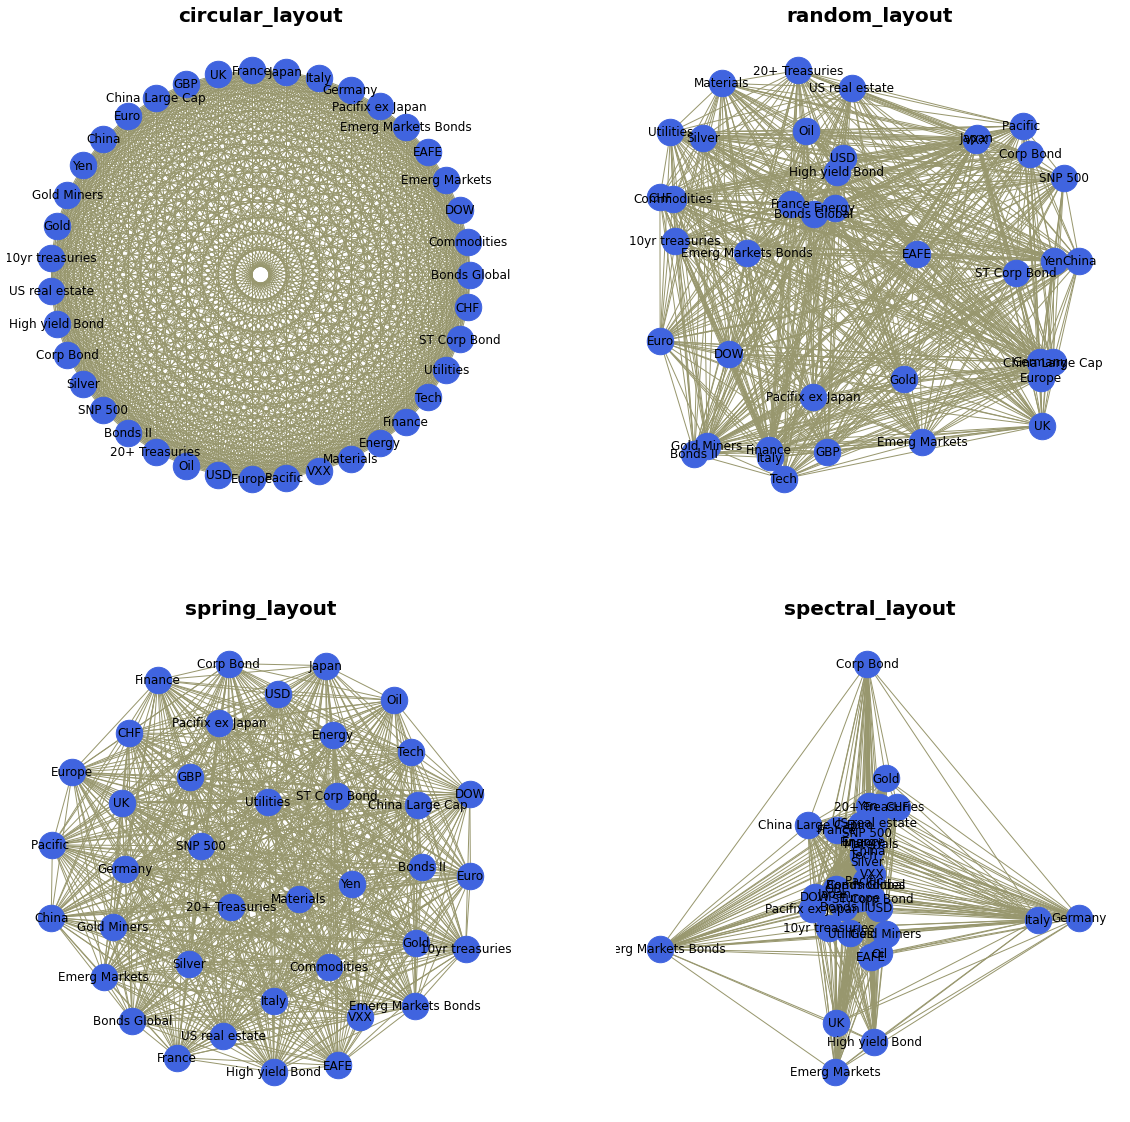

<IPython.core.display.Javascript object>

In [55]:
# Creating Subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Saving the Different Layout Functions in a List
layouts = [nx.circular_layout, nx.random_layout, nx.spring_layout, nx.spectral_layout]

# Plotting Each Different Layout
for layout, ax in zip(layouts, axs.ravel()):
    nx.draw(
        asset_graph,
        with_labels=True,
        node_size=700,
        node_color="#4064DF",
        #edge_color="#6D4E4A",
        edge_color="#98976E",
        pos=layout(asset_graph),
        ax=ax,
    )
    ax.set_title(layout.__name__, fontsize=20, fontweight="bold")

plt.show()

Whilst these visualisations may look cool, they are not very useful in their current form as all nodes have the same number of edges (links), and each edge looks the same so no useful information about the correlations between ETFs can be gained.

## Enhanced and Improved Visualisation of the Network

The network visualisation can be improved in a number of ways by thinking about the sort of information which we are looking to uncover from this analysis. It is important to think about what questions we wish to answer from the data and then design the visualisation to gain the most insight for the question in hand. For the purposes of enhancing the visualisation, We will assume that the audience for this visualisation will be investors wanting to assess risk in their portfolio. Investors would want to identify which assets are correlated and uncorrelated with each other in order to assess the unsystematic risk in their portfolio. Therefore, from this visualisation the user would want to quickly understand:
- which assets show strong/meaningful correlations (i.e. >0.5) with each other
- are these correlations positive or negative
- which are the most/least 'connected' assets. (i.e. which assets share the most/least strong correlations with other assets in the dataset)
- which groups of assets behave similarly (i.e. which assets are correlated with the same type of other assets)

With this information, an investor could identify if they held a number of assets which behave the same (increased risk) and identify assets which show very few correlations with assets currently held in the portfolio and investigate these as a potential opportunity for diversification. 

For a first iteration to improve the network visualisation we can take the circular layout graph from above and make the following changes:
- reduce the number of connections between nodes by adding a threshold value for the strength of correlation
- introduce colour to signify positive or negative correlations
- scale the edge thickness to indicate the magnitude of correlation
- scale the size of nodes to indicate which assets have the greatest number of strong correlations with the rest of the assets in the dataset




### Removal of the Edges Below a Threshold

In [56]:
# 'winner takes all' method - Set the Minium Correlation Threshold to Remove Some of the Edges from the Diagram

threshold = 0.5

# Creating a New Graph From the Edge List
asset_graph_enhanced = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# A List to Store Edges to be Removed
remove = []

# Looping through the Edges in the 'asset_graph_enhanced' Graph and Find Correlations which are Below the Threshold
for asset_1, asset_2 in asset_graph_enhanced.edges():
    corr = asset_graph_enhanced[asset_1][asset_2]["correlation"]
    # Add to Remove Node List if abs(corr) < threshold
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# Removing the Edges contained in the Remove List
asset_graph_enhanced.remove_edges_from(remove)

print(str(len(remove)) + " Edges Removed...")

530 Edges Removed...


<IPython.core.display.Javascript object>

### Custom Function to Create Colour, Edge Thickness and Node Size Features

In [58]:
def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # red
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation) ** scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor


# Assignment of colours to edges depending on positive or negative correlation
# Assignment of edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(asset_graph_enhanced, "correlation").items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# Assignment node size depending on number of connections (degree)
node_size = []
for key, value in dict(asset_graph_enhanced.degree).items():
    node_size.append(assign_node_size(value))

print("Function Definition Completed")

Function Definition Completed


<IPython.core.display.Javascript object>

### Drawing the Improved and the Enhanced Graph

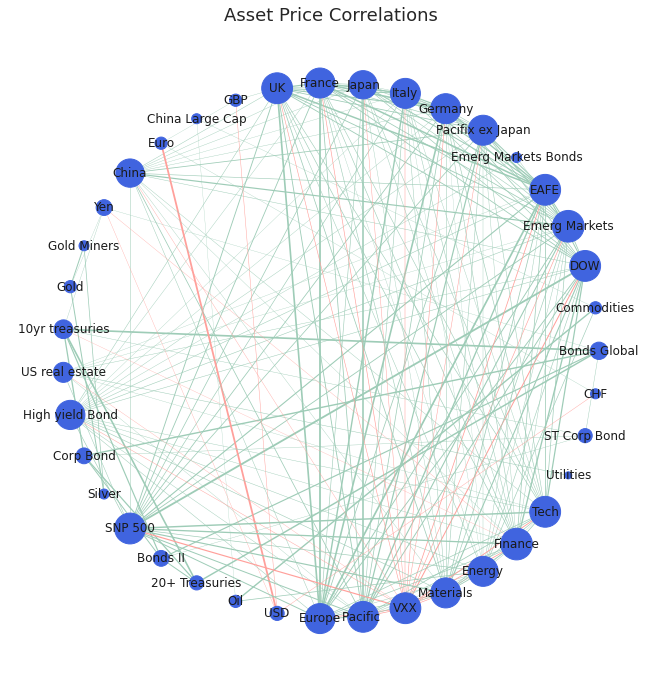

<IPython.core.display.Javascript object>

In [60]:
# Drawing the Improved and the Enhanced Graph - Circular Layout

sns.set(rc={"figure.figsize": (9, 9)})
font_dict = {"fontsize": 18}

nx.draw(
    asset_graph_enhanced,
    pos=nx.circular_layout(asset_graph_enhanced),
    with_labels=True,
    node_size=node_size,
    node_color="#4064DF",
    edge_color=edge_colours,
    width=edge_width,
)
plt.title("Asset Price Correlations", fontdict=font_dict)
plt.show()

The network visualisation has been improved in four main ways:
- less cluttered: we have removed edges with weak correlations and kept only the edges with significant (actionable) correlations
- identify type of correlation: simple intuitive colour scheme to show positive (green) or negative (red) correlations 
- identify strength of correlation: we now are able to assess the relative strength of correlations between nodes, with prominence given to the correlations with the greatest magnitude
- identify the most connected nodes: the size of the nodes has been adjusted to emphasise which nodes have the greatest number of strong correlations with other nodes in the network

Looking at this network we could now quickly identify which assets are highly correlated and therefore may pose increased risk on the portfolio. The viewer could also identify and investigate further the assets with low degree of connectivity (smaller node size) as these are weakly correlated with the other assets in the sample and may provide an opportunity to diversify the portfolio.

The circular layout, however, does not group the nodes in a meaningful order, it just orders the nodes in the order in which they were created, therefore it is difficult to gain insight as to which assets are most similar to each other in terms of correlations to other nodes. We can improve this with a spring based layout using the 'Fruchterman-Reingold' algorithm [2] which sets the positions of the nodes using a cost function which minimises the distances between strongly correlated nodes. This algorithm will therefore cluster the nodes which are strongly correlated with each other allowing the viewer to quickly identify groups of assets with similar properties.

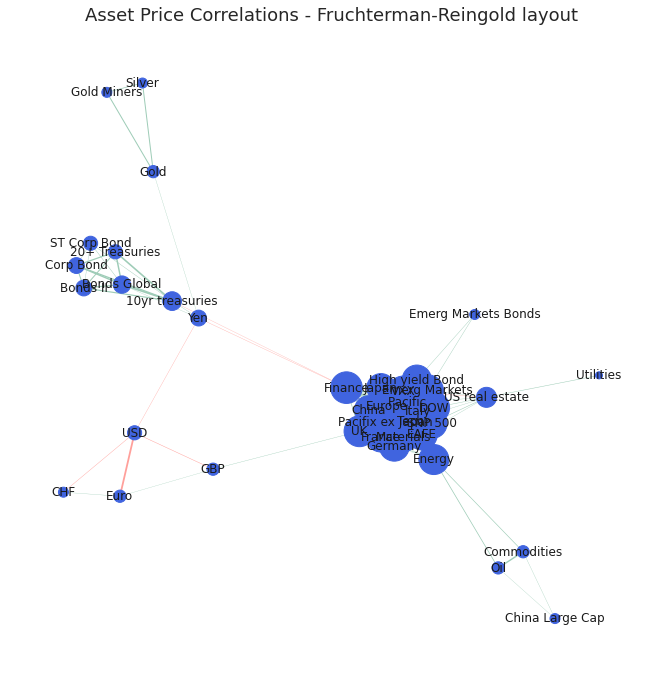

<IPython.core.display.Javascript object>

In [62]:
# Drawing the Improved and the Enhanced Graph - Spring Based Layout

nx.draw(
    asset_graph_enhanced,
    pos=nx.fruchterman_reingold_layout(asset_graph_enhanced),
    with_labels=True,
    node_size=node_size,
    node_color="#4064DF",
    edge_color=edge_colours,
    width=edge_width,
)
plt.title("Asset Price Correlations - Fruchterman-Reingold layout", fontdict=font_dict)
plt.show()

The Fruchterman Reingold layout has successfully grouped the assets into clusters of strongly correlated assets. As seen before in the heatmap visualisation, there are distinct clusters of assets which behave similarly to each other. There is a cluster containing bond ETFs, a cluster of precious metal ETFs (silver, gold, goldminers), a cluster of currencies (CHF, USD, Euro) and a large cluster for equities.

However, the main cluster of equities ETFs is still very cluttered as the nodes are very tightly packed and the node sizes and labels are overlapping making it difficult to make out.

As the layout now positions the nodes which are strongly correlated in space, it is no longer necessary to keep every single edge as it is implied that assets closer to each other in space are more strongly correlated. We can also convert the node sizes back to a consistent (smaller) size as the degree of each node is now meaningless.

### Visualisation of Minimum Spanning Tree 

It is common in financial networks to use a minimum spanning tree [3,4,5] to visualise networks. A minimum spanning tree reduces the edges down to a subset of edges which connects all the nodes together, without any cycles and with the minimum possible sum of edge weights (correlation value in this case). This essentially provides a skeleton of the graph, minimising the number of edges and reducing the clutter in the network graph. 

[Kruskal's algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm) is used to calculate the minimum spanning tree and is fairly intuitive. However, Networkx has an inbuilt function which calculates the minimum spanning tree for us. 

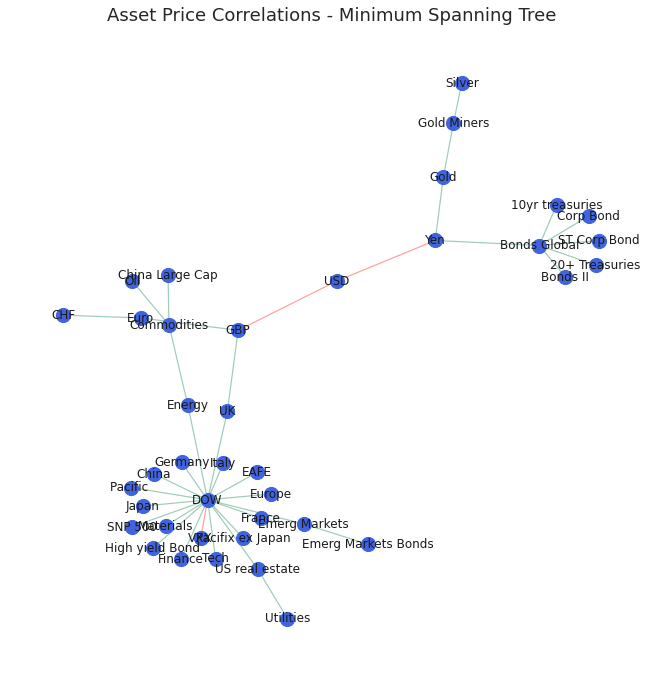

<IPython.core.display.Javascript object>

In [63]:
# Creation of the Minimum Spanning Tree Layout Visualisation from the "asset_graph_enhanced" Graph
# (After the Removal of the Small correlations)

mst = nx.minimum_spanning_tree(asset_graph_enhanced)

edge_colours = []

# Assignment of the Edge Colours
for key, value in nx.get_edge_attributes(mst, "correlation").items():
    edge_colours.append(assign_colour(value))


# Drawing the Minimum Spanning Tree. Setting the Node Size and Width to a Constant Value
nx.draw(
    mst,
    with_labels=True,
    pos=nx.fruchterman_reingold_layout(mst),
    node_size=200,
    node_color="#4064DF",
    edge_color=edge_colours,
    width=1.2,
)

# Set Title
plt.title("Asset Price Correlations - Minimum Spanning Tree", fontdict=font_dict)
plt.show()

The improved graph has made the clusters of nodes more readable by reducing the node size and reducing the number of edges in the graph. However, reducing the clutter was at the expense of conveying some information about the nodes such as nodes with the most strong correlations and their relative strengths.

## Interactive User-Friendly Visualisation



Finally, I will explore the use of interactive plotting libraries to enhance the user experience and alleviate some of the missing information issues with the use of informative tooltips. 

Currently the network is very 'static' and does not convey any information other than spacial relationships between strongly correlated assets. Although useful, this logically leads the viewer to ask more questions about the properties of each individual node in a cluster such as their historical returns and the nodes with which it is least correlated to.

One way to include such information about each node is to use an interactive graph with informative tooltips. This can be achieved using the Plotly[6] python library which offers a python api to create interactive javascript graphs built in d3.js. The following code uses the Plotly api to create a graph with the following features:
- interactivity, such as zoom, to focus on clusters of nodes
- tooltips which provides useful information about the node when the user hovers over it
- node sizes proportional to the annualised returns of each asset
- node colours to show asset positive or negative return over the dataset timeframe

**Plotly**

The Python code required for Ploty graphs can be a little bit more involved than out of the box matplotlib or seaborn charts but allows for much more customisation.

The main benefit of using Plotly in this example is the use of tooltips. In these tooltips we can store lots of additional information about each ETF which we can access by hovering over the respective node in the graph.

There are obviously many different bits of information of use which we could incorporate into the tooltip. For this example I will add:
- annualised returns of the asset class
- annualised volatility of the asset class
- the top and bottom 3 assets which the asset of interest is most/least strongly correlated with

### Custom Functions to Get the Node Information to Populate Tooltips


The following functions calculate the above quantities. It should be noted that Plotly tooltips are formatted using html. Therefore the input to the tooltip should be a string with the relevant html tags for any formatting that is required. 

In [64]:
# Custom Function 1

def convert_rankings_to_string(ranking):
    """
    Concatenate list of nodes and correlations into a single html
    string (required format for the plotly tooltip)

    Inserts html "<br>" inbetween each item in order to add a new
    line in the tooltip
    """
    s = ""
    for r in ranking:
        s += r + "<br>"
    return s

# Custom Function 2

def calculate_stats(returns=asset_log_returns):
    """calculate annualised returns and volatility for all ETFs

    Returns:
        tuple: Outputs the annualised volatility and returns as a list of
            floats (for use in assigning node colours and sizes) and also
            as a lists of formatted strings to be used in the tool tips.
    """

    # log returns are additive, 252 trading days
    annualized_returns = list(np.mean(returns) * 252 * 100)

    annualized_volatility = [
        np.std(returns[col] * 100) * (252 ** 0.5) for col in list(returns.columns)
    ]

    # create string for tooltip
    annualized_volatility_2dp = [
        "Annualized Volatility: " "%.1f" % r + "%" for r in annualized_volatility
    ]
    annualized_returns_2dp = [
        "Annualized Returns: " "%.1f" % r + "%" for r in annualized_returns
    ]

    return (
        annualized_volatility,
        annualized_returns,
        annualized_volatility_2dp,
        annualized_returns_2dp,
    )

# Custom Function 3

def get_top_and_bottom_three(df=correlation_matrix):
    """
    get a list of the top 3 and bottom 3 most/least correlated assests
    for each node.

    Args:
        df (pd.DataFrame): pandas correlation matrix

    Returns:
        top_3_list (list): list of lists containing the top 3 correlations
            (name and value)
        bottom_3_list (list): list of lists containing the bottom three
            correlations (name and value)
    """

    top_3_list = []
    bottom_3_list = []

    for col in df.columns:

        # exclude self correlation #reverse order of the list returned
        top_3 = list(np.argsort(abs(df[col]))[-4:-1][::-1])
        # bottom 3 list is returned in correct order
        bottom_3 = list(np.argsort(abs(df[col]))[:3])

        # get column index
        col_index = df.columns.get_loc(col)

        # find values based on index locations
        top_3_values = [df.index[x] + ": %.2f" % df.iloc[x, col_index] for x in top_3]
        bottom_3_values = [
            df.index[x] + ": %.2f" % df.iloc[x, col_index] for x in bottom_3
        ]

        top_3_list.append(convert_rankings_to_string(top_3_values))
        bottom_3_list.append(convert_rankings_to_string(bottom_3_values))

    return top_3_list, bottom_3_list

print("All Function Definitions Completed")

All Function Definitions Completed


<IPython.core.display.Javascript object>

### Custom Function to Generate The Coordinates

Plotly does not have an 'out-of-the-box' network graph chart, therefore we need to 'imitate' the network layout by plotting the data as a scatter plot which plots the graph nodes, and plot a 'line' chart on top which draws the lines which connect each point. To achieve this we need a function which converts the Fruchterman Reingold coordinates calculated using networtx into an x and y series to create the scatter plot. We also need to store the x and y coordinates of the start and end of each edge which will be used to draw the 'line' chart.

The function calculates the x and y coordinates for the scatter plot (Xnodes and Ynodes) and the coordinates of the starting and ending positions of the lines connecting nodes (Xedges, Yedges):


In [65]:
# Custom Function to Generate the Coordinates

def get_coordinates(G=mst):
    """Returns the positions of nodes and edges in a format
    for Plotly to draw the network
    """
    # get list of node positions
    pos = nx.fruchterman_reingold_layout(mst)

    Xnodes = [pos[n][0] for n in mst.nodes()]
    Ynodes = [pos[n][1] for n in mst.nodes()]

    Xedges = []
    Yedges = []
    for e in mst.edges():
        # x coordinates of the nodes defining the edge e
        Xedges.extend([pos[e[0]][0], pos[e[1]][0], None])
        Yedges.extend([pos[e[0]][1], pos[e[1]][1], None])

    return Xnodes, Ynodes, Xedges, Yedges

print("Function Definition Completed")

Function Definition Completed


<IPython.core.display.Javascript object>

### Graph Code to Plot the Plotly Graph

Now we can finally plot the network as an interactive Plotly visualisation.

First, we need to calculate all the quantities and concatenate them into a html string to be used as an input for the tooltip. Then we need to calculate the coordinates for the scatter and line plots and finally define the node color and size which depend on the direction and size of the annualised returns.

In [66]:
# Get the Statistics for the Tooltip

# Make the List of Node Labels
node_label = list(mst.nodes())

# Calculating the Annualised Returns, Annualised Volatility and Round to 2dp
annual_vol, annual_ret, annual_vol_2dp, annual_ret_2dp = calculate_stats()

# Get the Top and Bottom 3 Correlations for Each Node
top_3_corrs, bottom_3_corrs = get_top_and_bottom_three()


# Create Tooltip String by Concatenating the Statistics
description = [
    f"<b>{node}</b>"
    + "<br>"
    + annual_ret_2dp[index]
    + "<br>"
    + annual_vol_2dp[index]
    + "<br><br>Strongest correlations with: "
    + "<br>"
    + top_3_corrs[index]
    + "<br>Weakest correlations with: "
    "<br>" + bottom_3_corrs[index]
    for index, node in enumerate(node_label)
]

# Get the Coordinates for the Nodes and the Edges
Xnodes, Ynodes, Xedges, Yedges = get_coordinates()

# Assignment of the Node Colour Depending on the Positive or Negative Annualised Returns
node_colour = [assign_colour(i) for i in annual_ret]

# Assignment of the Node Size based on the Annualised Returns Size (Scaled by a Factor)
node_size = [abs(x) ** 0.5 * 5 for x in annual_ret]

print("Execution Completed")

Execution Completed


<IPython.core.display.Javascript object>

To plot the network we define the scatter plot (tracer) and line plot (tracer_marker) series and define some cosmetic parameters which dictate the graph layout.

In [83]:
# Plotting the Graph

import plotly.graph_objects as go

# Nodes Configuration
tracer_marker = go.Scatter(
    x=Xnodes,
    y=Ynodes,
    mode="markers+text",
    textposition="top center",
    marker=dict(size=node_size, line=dict(width=1), color=node_colour),
    hoverinfo="text",
    hovertext=description,
    text=node_label,
    textfont=dict(size=7),
    showlegend=False,
)


# Edges Configuration
tracer = go.Scatter(
    x=Xedges,
    y=Yedges,
    mode="lines",
    line=dict(color="#DCDCDC", width=1),
    hoverinfo="none",
    showlegend=False,
)


axis_style = dict(
    title="",
    titlefont=dict(size=20),
    showgrid=False,
    zeroline=False,
    showline=False,
    ticks="",
    showticklabels=False,
)


layout = dict(
    title="Plotly - Interactive User-Friendly Minimum Spanning Tree",
    width=800,
    height=800,
    autosize=False,
    showlegend=False,
    xaxis=axis_style,
    yaxis=axis_style,
    hovermode="closest",
    plot_bgcolor="#fff",
)


fig = go.Figure()
fig.add_trace(tracer)
fig.add_trace(tracer_marker)
fig.update_layout(layout)

fig.show()

display(
    HTML(
        """
        <p>Node sizes are proportional to the size of
        the annualised returns.<br>Node colours signify positive
        or negative returns since the beginning of the timeframe.</p>
        """
    )
)

<IPython.core.display.Javascript object>

In [87]:
# Saving the Interactive Visualisation to a JPEG Image File

#fig.write_image("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Network_Analytics_of_Financial_Asset_Classes_Prices_Using_NetworkX_and_Visualisations/output/plotly_asset_classes_prices_network_graph.jpeg")

print("Image is Saved Successfully...")

Image is Saved Successfully...


<IPython.core.display.Javascript object>

In [69]:
# Saving the Interactive Visualisation Data Structure to a json File

fig.write_json("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Network_Analytics_of_Financial_Asset_Classes_Prices_Using_NetworkX_and_Visualisations/output/plotly_asset_classes_prices_network.json")

print("File is Saved Successfully...")

File is Saved Successfully...


<IPython.core.display.Javascript object>

With this final network layout, we have summarised the most important information about the relationships between assets in the dataset. Users can quickly identify clusters of assets which are strongly correlated with each other, gauge the performance of the asset over the timeframe by looking at the node sizes and colours and can get more detailed information about each node by hovering over it.

## Conclusion

As per the above implementation; we were able to analyse the financial asset classes prices data in a effective way with multiple correlation visualisations and further create enhanced interactive network data structures visualisations in a user-friendly manner.